In [11]:
import pandas as pd
import sqlite3

In [12]:
con = sqlite3.connect('../data/checking-logs.sqlite.sqlite copy')

## • run a query that gets the datetime from the pageviews table, selecting only the users and not the admins

In [13]:
query_datetime = """
SELECT pageviews.uid as views, pageviews.datetime AS 'date'
FROM pageviews
WHERE pageviews.uid like 'user_%'

"""

dataframe_views = pd.io.sql.read_sql(query_datetime, con, parse_dates=['date'])
dataframe_views

,views,date
0,user_30,2020-04-17 22:46:26.785035
1,user_14,2020-04-18 10:53:52.623447
2,user_17,2020-04-18 10:56:55.833899
3,user_14,2020-04-18 10:57:37.331258
4,user_17,2020-04-18 12:05:48.200144
...,...,...
982,user_28,2020-05-21 18:45:20.441142
983,user_19,2020-05-21 23:03:06.457819
984,user_25,2020-05-21 23:23:49.995349
985,user_5,2020-05-22 11:30:18.368990


## • using Pandas, create a new dataframe where the visits are counted and grouped by date

In [18]:
group_views = dataframe_views.groupby(dataframe_views['date'].dt.date).count()['views'].reset_index()
group_views.set_index('date', inplace=True)
group_views

,views
date,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1
2020-04-23,5
2020-04-25,1
2020-04-26,8
2020-04-28,2


## • using Pandas method .plot(), create a graph


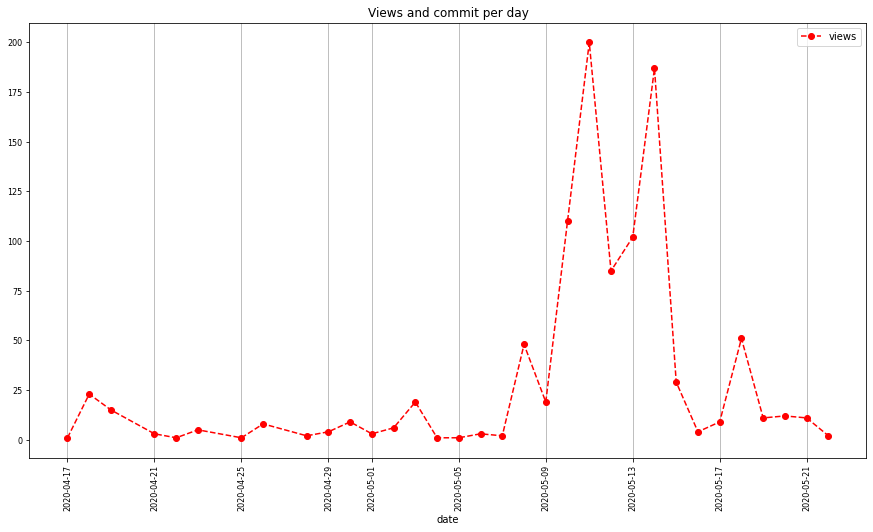

In [17]:
plot_views_commits =group_views.plot(fontsize=8,
           figsize=(15, 8),
           title='Views and commit per day',
           color=['r', 'c'],
           style=['--','-.'],
           grid=True,
           rot=90)
plot_views_commits.grid(axis='y')
plot_views_commits.get_lines()[0].set_marker('o')
plot_views_commits.get_legend().get_lines()[0].set_marker('o')

In [16]:
con.close()

“How many times was the number of views larger than 150?”
The answer is 2